<a target="_blank" href="https://colab.research.google.com/github/ProgrammierenNachOFI/Altersvorsorge/blob/main/docs/ahv_tutorial.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Die AHV und die demographische Entwicklung

Im Zusammenhang mit Revisionsprojekten der AHV wird oft mit der
demographischen Entwicklung argumentiert. In diesem Zusammenhang ist ein
beliebtes Instrument zur Darstellung der demographischen Situation die
Alters- bzw. Bevölkerungspyramide.

In diesem Notebook soll gezeigt werden, wie eine solche Alterspyramide
selber erstellt werden kann.

## Daten

Um eine Alterspyramide plotten zu können, braucht es in erster Linie
Daten.  
In der Schweiz werden diese durch das 
[Bundesamt für Statistik](https://www.bfs.admin.ch/bfs/de/home.html)
erhoben und zur Verfügung gestellt.

Die konkreten Daten, welche für eine Alterspyramide erforderlich sind,
finden sich unter dem Thema *Bevölkerung*. Dort werden Daten zur
Altersverteilung unter dem Untertitel *Stand und Entwicklung* zur
Verfügung gestellt.

Am unteren Ende der Themenseite finden sich Reiter zu weiterführenden
Informationen.

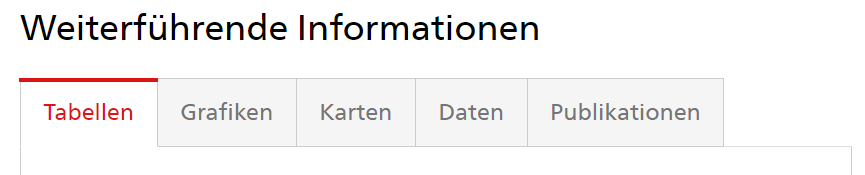

Als Datenquelle findet man unter dem Reiter *Daten* einen Datensatz zur
ständigen Wohnbevölkerung nach Geschlecht und Alter von 1860 bis 2022.
Unter dem
[Link
STAT-TAB](https://www.pxweb.bfs.admin.ch/pxweb/de/px-x-0102030000_101/px-x-0102030000_101/px-x-0102030000_101.px)
hat man Zugriff auf die Daten mit verschiedenen Filtermöglichkeiten. Die
gefilterten Daten können dann in verschiedenen Formaten heruntergeladen
werden. Für die Weiterverarbeitung der Daten mit Python eignet sich der Download als `.csv`
Datei.

## Python Libraries für die Datenvisualisierung

Python stellt Libraries für die Aufbereitung und die eigentliche
Visualisierung von Daten zur Verfügung.

### Datenaufbereitung

Zur Aufbereitung der Daten, die man visualisieren will, wird die 
[pandas Library](https://pandas.pydata.org/) 
verwendet. In den Worten der Entwickler ist pandas ein schnelles,
mächtiges, flexibles und einfach zu verwendendes Open Source Werkzeug
zur Datenanalyse und -bearbeitung, welches auf Python aufbaut.

### Datenvisualisierung

Für die eigentliche Visualisierung der Daten wird die
[Matplotlib Library](https://matplotlib.org/)
verwendet. Die Selbstdeklaration der Entwickler lautet selbstbewusst:

>Matplotlib ist eine umfassende Bibliothek zur Erstellung statischer,
>animierter und interaktiver Visualisierungen in Python. Matplotlib
>macht einfache Dinge einfach und schwierige Dinge möglich. 

### Import der erforderlichen Libraries

In der folgenden Zelle wird pandas komplett und von Matplotlib einzelne 
(erforderliche) Module importiert.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.ticker as ticker

Um die Auflösung der erzeugten Plots zu erhöhen, wird in der Nächsten
Zelle die generelle Einstellung für die Auflösung angepasst.

In [ ]:
plt.rcParams['figure.dpi'] = 300

## Import und Aufbereitung der Daten des Bundesamtes für Statistik (BFS)

### Import der Daten in Google Colab

Damit der Import der Bevölkerungsdaten auf Google Colab (oder einer
anderen online Plattform) funktioniert, werden die Daten aus dem GitHub
Repository via url importiert. Dazu wird die url der Variablen `url`
zugewiesen und diese dem Importstatement als Argument übergeben.  

Die url lautet  
https://raw.githubusercontent.com/ProgrammierenNachOFI/Altersvorsorge/main/data/240218_bevoelkerung_entwicklung.csv

In [ ]:
url = https://raw.githubusercontent.com/ProgrammierenNachOFI/Altersvorsorge/main/data/240218_bevoelkerung_entwicklung.csv
df = pd.read_csv(url, sep=",")  
print(df.head(5))  

### Import in einem lokal geklonten Repository

Um die Dateien in einem lokal geklonten Repository importieren zu
können, wird der relative Pfad zur Datei verwendet. Dieser lautet im
vorliegenden Fall  
`../data/240218_bevoelkerung_entwicklung.csv`

In [ ]:
df=pd.read_csv('../data/240218_bevoelkerung_entwicklung.csv', 
               sep=",")
print(df.head(5))

pandas DataFrames ermöglichen es, Daten zu filtern. In der nächsten
Zelle wird `df` nach Männern und Frauen aufgeteilt und je einem eigenen
DataFrame zugewiesen. 

In [ ]:
df_maenner = df.loc[df['Geschlecht'] == 'Mann']
df_frauen  = df.loc[df['Geschlecht'] == 'Frau']

Damit die Zahl der Balken in der Alterspyramide nicht zu gross wird,
werden im vorliegenden Beispiel die Alter in Tranchen von drei Jahren
zusammengefasst. Für die Beschriftung der entsprechenden Achse im
Diagramm wird dazu eine Liste `alter` mit den Altersgruppen erstellt. 

In [ ]:
alter = ['0 - 2', '3 - 5', '6 - 8', '9 - 11', '12 - 14', '15 - 17', 
         '18 - 20', '21 - 23', '24 - 26', '27 - 29', '30 - 32', 
         '33 - 35', '36 - 38', '39 - 41', '42 - 44', '45 - 47', 
         '48 - 50', '51 - 53', '54 - 56', '57 - 59', '60 - 62', 
         '63 - 65', '66 - 68', '69 - 71', '72 - 74', '75 - 77', 
         '78 - 80', '81 - 83', '84 - 86', '87 - 89', '90 - 92', 
         '93 - 95', '96 - 98', '99 +']

Um die Altersgruppen zu addieren, wird die folgende Funktion verwendet:

In [ ]:
def summe_in_dreierschritten(df, spalte):
    summenliste = []
    for i in range(1, len(df), 3):
        summe = df[spalte][i:i+3].sum()
        summenliste.append(summe)
    return summenliste


In [ ]:
maenner_gruppiert_1948 = summe_in_dreierschritten(df_maenner, '1948')
maenner_gruppiert_1970 = summe_in_dreierschritten(df_maenner, '1970')
maenner_gruppiert_2022 = summe_in_dreierschritten(df_maenner, '2022')
frauen_gruppiert_1948  =  summe_in_dreierschritten(df_frauen, '1948')
frauen_gruppiert_1970  =  summe_in_dreierschritten(df_frauen, '1970')
frauen_gruppiert_2022  =  summe_in_dreierschritten(df_frauen, '2022')

Die neu entstandenen Listen werden in der folgenden Zelle in einem
DataFrame `gruppierte_daten` zusammengefasst. Dazu werden der Funktion
`pd.DataFrame()` ein
[Python Dictionary](https://realpython.com/python-dicts/#defining-a-dictionary)
als Argument übergeben und der so erzeugte DataFrame wird der Variabeln
`gruppierte_daten` zugewiesen.

In [ ]:
gruppierte_daten = pd.DataFrame({'Alter': alter, 
                                 'Maenner 1948': maenner_gruppiert_1948, 
                                 'Maenner 1970': maenner_gruppiert_1970, 
                                 'Maenner 2022': maenner_gruppiert_2022, 
                                 'Frauen 1948': frauen_gruppiert_1948, 
                                 'Frauen 1970': frauen_gruppiert_1970, 
                                 'Frauen 2022': frauen_gruppiert_2022})

Damit die Daten gegebenenfalls mit andern Ländern verglichen werden
könnten, werden die Altersverteilungen in Prozenten der entsprechenden
Referenzjahre ausgedrückt.

In [ ]:
gruppierte_daten['m 1948 rel']  = gruppierte_daten['Maenner 1948'] / df['1948'][0] * -100
gruppierte_daten['m 48 rel 70'] = gruppierte_daten['Maenner 1948'] / df['1970'][0] * -100
gruppierte_daten['m 48 rel 22'] = gruppierte_daten['Maenner 1948'] / df['2022'][0] * -100
gruppierte_daten['m 70 rel 22'] = gruppierte_daten['Maenner 1970'] / df['2022'][0] * -100
gruppierte_daten['m 1970 rel']  = gruppierte_daten['Maenner 1970'] / df['1970'][0] * -100
gruppierte_daten['m 2022 rel']  = gruppierte_daten['Maenner 2022'] / df['2022'][0] * -100
gruppierte_daten['f 1948 rel']  = gruppierte_daten['Frauen 1948']  / df['1948'][0] *  100
gruppierte_daten['f 48 rel 70'] = gruppierte_daten['Frauen 1948']  / df['1970'][0] *  100
gruppierte_daten['f 48 rel 22'] = gruppierte_daten['Frauen 1948']  / df['2022'][0] *  100
gruppierte_daten['f 70 rel 22'] = gruppierte_daten['Frauen 1970']  / df['2022'][0] *  100
gruppierte_daten['f 1970 rel']  = gruppierte_daten['Frauen 1970']  / df['1970'][0] *  100
gruppierte_daten['f 2022 rel']  = gruppierte_daten['Frauen 2022']  / df['2022'][0] *  100

## Visualisierung der aufbereiteten Daten

Die Daten werden mit `matblotlib.pyplot.barh` als horizontale Balken
dargestellt. Durch die Art, wie die entsprechenden Libraries importiert
worden sind, kann ein horizontaler Balken durch die Funktion `plt.barh`
dargestellt werden. Als ersten zwei Argumente werden der Funktion 
die `x` und `y` Werte übergeben (Achtung: Weil die Grafik vertikal
gestapelt wird, 
werden die `x` Werte vertikal dargestellt). Die Argumente drei und
folgende dienen der Steuerung der Darstellung.

Die Besonderheiten einzelner Befehle wird in der nächsten Zelle als
Kommentar erläutert.

In [ ]:
# definiert die Standardschriftgrösse
plt.rcParams.update({'font.size': 6})
# die Liste farben_m/f steuert die Farbe der Balken
# in Abhängigkeit des Index'; so werden die Balken
# der nicht Erwerbstätigen gedimmt
farben_m = ['cornflowerblue' if idx <= 5
            or idx >= 21 else 'blue' 
            for idx in gruppierte_daten.index]
farben_f = ['lightcoral' if idx <= 5
            or idx >= 21 else 'red' 
            for idx in gruppierte_daten.index]
# erstellt das eigentliche Diagramm
plt.barh(gruppierte_daten['Alter'], 
         gruppierte_daten['m 1948 rel'], 
         label='Männer', color=farben_m)
plt.barh(gruppierte_daten['Alter'], 
         gruppierte_daten['f 1948 rel'], 
         label='Frauen', color=farben_f)
# formatiert die x-Achse mit positiven Werten (muss man nicht auswendig wissen)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{abs(x)}"))
# Titel des Diagramms
plt.title('Bevölkerungsverteilung 1948', fontsize=12)
# Beschriftung der y-Achse
plt.ylabel('Altersgruppen', fontsize=10)
# Beschriftung der x-Achse
plt.xlabel('Relativer Anteil an der Bevölkerung in %', fontsize=10)
# erstellt eine Legende
plt.legend()
# löst die Darstellung des Diagramms aus
plt.show()

In [ ]:
plt.rcParams.update({'font.size': 6})

farben_m = ['cornflowerblue' if idx <= 5
            or idx >= 21 else 'blue' 
            for idx in gruppierte_daten.index]
farben_f = ['lightcoral' if idx <= 5
            or idx >= 21 else 'red' 
            for idx in gruppierte_daten.index]

plt.barh(gruppierte_daten['Alter'], 
         gruppierte_daten['m 1970 rel'], 
         label='Männer', 
         color=farben_m)

plt.barh(gruppierte_daten['Alter'], 
         gruppierte_daten['f 1970 rel'], 
         label='Frauen', 
         color=farben_f)

# fügt die Balken für das Jahr 1948 als Umriss hinzu
plt.barh(gruppierte_daten['Alter'],
         gruppierte_daten['f 48 rel 70'], edgecolor='black', fill=False)
plt.barh(gruppierte_daten['Alter'],
         gruppierte_daten['m 48 rel 70'], edgecolor='black', 
         fill=False, label='1948 (in % von 1970)')



plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{abs(x)}"))
plt.title('Bevölkerungsverteilung 1970', fontsize=12)
plt.ylabel('Altersgruppen', fontsize=10)
plt.xlabel('Relativer Anteil an der Bevölkerung in %', fontsize=10)
plt.legend()
plt.show()

In [ ]:
plt.rcParams.update({'font.size': 6})

farben_m = ['cornflowerblue' if idx <= 5
            or idx >= 21 else 'blue' 
            for idx in gruppierte_daten.index]
farben_f = ['lightcoral' if idx <= 5
            or idx >= 21 else 'red' 
            for idx in gruppierte_daten.index]

plt.barh(gruppierte_daten['Alter'], 
         gruppierte_daten['m 2022 rel'], 
         label='Männer', color=farben_m)
plt.barh(gruppierte_daten['Alter'], 
         gruppierte_daten['f 2022 rel'], 
         label='Frauen', color=farben_f)

plt.barh(gruppierte_daten['Alter'],
         gruppierte_daten['f 70 rel 22'], edgecolor='black', fill=False)
plt.barh(gruppierte_daten['Alter'],
         gruppierte_daten['f 48 rel 22'], edgecolor='silver', fill=False)
plt.barh(gruppierte_daten['Alter'],
         gruppierte_daten['m 70 rel 22'], label='1970 (in % von 2022)',
         edgecolor='black', fill=False)
plt.barh(gruppierte_daten['Alter'],
         gruppierte_daten['m 48 rel 22'], label='1948 (in % von 2022)',
         edgecolor='silver', fill=False)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{abs(x)}"))
plt.title('Bevölkerungsverteilung 2022', fontsize=12)
plt.ylabel('Altersgruppen', fontsize=10)
plt.xlabel('Relativer Anteil an der Bevölkerung in %', fontsize=10)
plt.legend()
plt.show()

Das letzte Diagramm zeigt, dass, sofern am Finanzierungssystem nichts
geändert wird, im Gegensatz zur Vergangenheit aufgrund der gestiegenen
Lebenserwartung in Kombination mit dem Geburtenrückgang in Zukunft immer
weniger Erwerbstätige immer mehr Rentner finanzieren müssen. 